In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/CSPX_feature_engineered.csv', parse_dates=['Date'])
df.head(10)

,Unnamed: 0,Date,Close,High,Low,Open,Volume,MA5,MA20,Return,MA50,Volatility20,Year,Month,Day,Lag1,Lag2,Lag3
0,0,2019-03-12,274.179993,274.540009,272.829987,273.839996,60269.0,271.404004,272.340501,0.007163,263.605200,0.006188,2019,3,12,272.230011,268.029999,270.040009
1,1,2019-03-13,276.070007,276.500000,273.779999,273.790009,94606.0,272.110004,272.678001,0.006893,264.228600,0.006306,2019,3,13,274.179993,272.230011,268.029999
2,2,2019-03-14,275.899994,276.760010,275.190002,276.200012,41365.0,273.282001,273.051001,-0.000616,264.920600,0.006234,2019,3,14,276.070007,274.179993,272.230011
3,3,2019-03-15,277.480011,277.640015,275.829987,276.089996,70838.0,275.172003,273.363002,0.005727,265.547400,0.005957,2019,3,15,275.899994,276.070007,274.179993
4,4,2019-03-18,277.279999,278.309998,277.119995,277.320007,33259.0,276.182001,273.619502,-0.000721,266.107800,0.005948,2019,3,18,277.480011,275.899994,276.070007
5,5,2019-03-19,279.559998,279.929993,278.500000,278.500000,44673.0,277.258002,273.992502,0.008223,266.709400,0.006157,2019,3,19,277.279999,277.480011,275.899994
6,6,2019-03-20,276.290009,278.399994,276.290009,278.140015,35533.0,277.302002,274.170502,-0.011697,267.177201,0.006806,2019,3,20,279.559998,277.279999,277.480011
7,7,2019-03-21,279.119995,279.880005,275.820007,276.010010,30320.0,277.946002,274.526501,0.010243,267.698200,0.007080,2019,3,21,276.290009,279.559998,277.279999
8,8,2019-03-22,275.989990,280.500000,275.350006,280.459991,76468.0,277.647998,274.641000,-0.011214,268.153200,0.007503,2019,3,22,279.119995,276.290009,279.559998
9,9,2019-03-25,274.579987,275.769989,273.619995,274.250000,78467.0,277.107996,274.594000,-0.005109,268.590600,0.007452,2019,3,25,275.989990,279.119995,276.290009


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head(10)

,Date,Close,High,Low,Open,Volume,MA5,MA20,Return,MA50,Volatility20,Year,Month,Day,Lag1,Lag2,Lag3
0,2019-03-12,274.179993,274.540009,272.829987,273.839996,60269.0,271.404004,272.340501,0.007163,263.605200,0.006188,2019,3,12,272.230011,268.029999,270.040009
1,2019-03-13,276.070007,276.500000,273.779999,273.790009,94606.0,272.110004,272.678001,0.006893,264.228600,0.006306,2019,3,13,274.179993,272.230011,268.029999
2,2019-03-14,275.899994,276.760010,275.190002,276.200012,41365.0,273.282001,273.051001,-0.000616,264.920600,0.006234,2019,3,14,276.070007,274.179993,272.230011
3,2019-03-15,277.480011,277.640015,275.829987,276.089996,70838.0,275.172003,273.363002,0.005727,265.547400,0.005957,2019,3,15,275.899994,276.070007,274.179993
4,2019-03-18,277.279999,278.309998,277.119995,277.320007,33259.0,276.182001,273.619502,-0.000721,266.107800,0.005948,2019,3,18,277.480011,275.899994,276.070007
5,2019-03-19,279.559998,279.929993,278.500000,278.500000,44673.0,277.258002,273.992502,0.008223,266.709400,0.006157,2019,3,19,277.279999,277.480011,275.899994
6,2019-03-20,276.290009,278.399994,276.290009,278.140015,35533.0,277.302002,274.170502,-0.011697,267.177201,0.006806,2019,3,20,279.559998,277.279999,277.480011
7,2019-03-21,279.119995,279.880005,275.820007,276.010010,30320.0,277.946002,274.526501,0.010243,267.698200,0.007080,2019,3,21,276.290009,279.559998,277.279999
8,2019-03-22,275.989990,280.500000,275.350006,280.459991,76468.0,277.647998,274.641000,-0.011214,268.153200,0.007503,2019,3,22,279.119995,276.290009,279.559998
9,2019-03-25,274.579987,275.769989,273.619995,274.250000,78467.0,277.107996,274.594000,-0.005109,268.590600,0.007452,2019,3,25,275.989990,279.119995,276.290009


In [5]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA5', 'MA20',
       'Return', 'MA50', 'Volatility20', 'Year', 'Month', 'Day', 'Lag1',
       'Lag2', 'Lag3'],
      dtype='object')

In [6]:
X = df.drop(columns=['Close', 'Date'])
y = df['Close']

In [8]:
train_size = int(len(df) * 0.8)
train_size

1172

In [9]:
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the model
- use XGBoost (for feature importance), or any baseline model.

In [12]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, tree_method='hist', random_state=42)

In [13]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
# Get feature importance from XGBoost
importance = model.feature_importances_
feature_names = X_train.columns

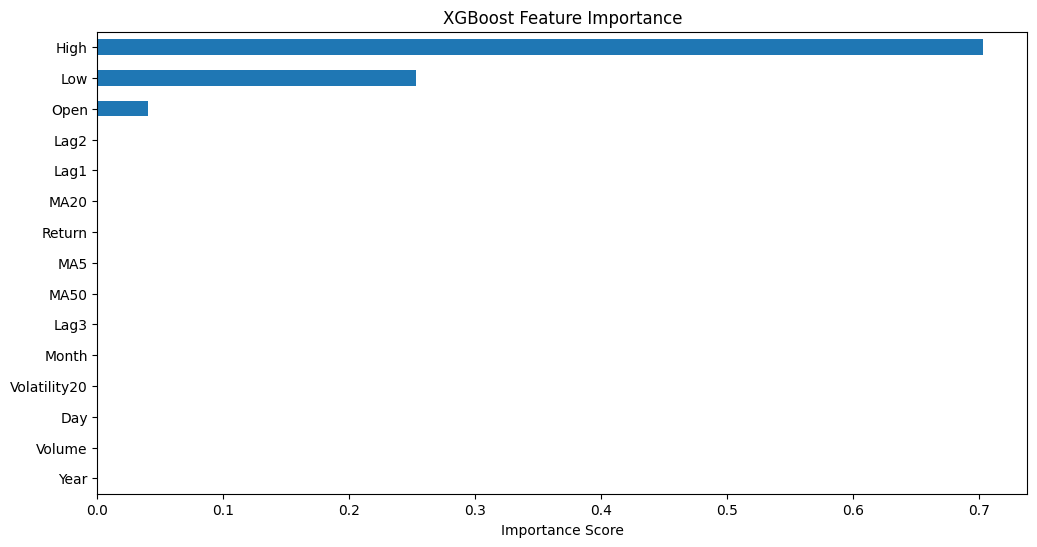

In [18]:
# Convert to Series for easier plotting
importance_series = pd.Series(importance, index=feature_names)
importance_series.sort_values().plot(kind='barh', figsize=(12,6), title='XGBoost Feature Importance')
plt.xlabel("Importance Score")
plt.show()